In [370]:

from warnings import filterwarnings
filterwarnings('ignore')

import os

import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.formula.api import ols

from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats


### Read data 

In [371]:
df = pd.read_csv('YALE-SPCOMP.csv')
df.head()

,Year,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio
0,1871-01-31,4.44,0.26,0.4,12.464061,5.320000,91.599130,5.363913,8.252174,NaN
1,1871-02-28,4.50,0.26,0.4,12.844641,5.323333,90.086245,5.204983,8.007666,NaN
2,1871-03-31,4.61,0.26,0.4,13.034972,5.326667,90.940801,5.128982,7.890742,NaN
3,1871-04-30,4.74,0.26,0.4,12.559226,5.330000,97.047287,5.323269,8.189645,NaN
4,1871-05-31,4.86,0.26,0.4,12.273812,5.333333,101.818048,5.447056,8.380086,NaN


In [372]:
df.shape

(1788, 10)

### Dropping unwanted columns

In [373]:
df=df.drop(columns='Year',axis=1)
df.head()

,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio
0,4.44,0.26,0.4,12.464061,5.320000,91.599130,5.363913,8.252174,NaN
1,4.50,0.26,0.4,12.844641,5.323333,90.086245,5.204983,8.007666,NaN
2,4.61,0.26,0.4,13.034972,5.326667,90.940801,5.128982,7.890742,NaN
3,4.74,0.26,0.4,12.559226,5.330000,97.047287,5.323269,8.189645,NaN
4,4.86,0.26,0.4,12.273812,5.333333,101.818048,5.447056,8.380086,NaN


In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1788 entries, 0 to 1787
Data columns (total 9 columns):
S&P Composite                   1788 non-null float64
Dividend                        1785 non-null float64
Earnings                        1785 non-null float64
CPI                             1788 non-null float64
Long Interest Rate              1788 non-null float64
Real Price                      1788 non-null float64
Real Dividend                   1785 non-null float64
Real Earnings                   1785 non-null float64
Cyclically Adjusted PE Ratio    1668 non-null float64
dtypes: float64(9)
memory usage: 125.8 KB


In [375]:
df.describe()

,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio
count,1788.000000,1785.000000,1785.000000,1788.000000,1788.000000,1788.000000,1785.000000,1785.000000,1668.000000
mean,287.415617,6.122340,14.164525,59.924884,4.545914,549.644435,15.995563,31.897773,17.010681
std,579.830261,10.741199,26.781028,73.387977,2.288319,610.184250,9.514509,26.696177,6.850493
min,2.730000,0.180000,0.160000,6.279613,1.500000,69.604422,5.128982,4.310423,4.784241
25%,7.847500,0.416700,0.550000,10.180580,3.228750,175.221455,8.831556,13.130502,11.845960
50%,16.915000,0.850000,1.397000,19.150000,3.838333,263.855931,13.265918,21.470555,16.271201
75%,134.725000,6.823330,14.580000,97.725000,5.172500,652.620646,20.304966,40.823415,20.593007
max,3223.380000,57.220000,135.270000,257.346000,15.320000,3223.380000,57.304685,136.031444,44.197940


### missing values

In [376]:
df.isnull().sum()

S&P Composite                     0
Dividend                          3
Earnings                          3
CPI                               0
Long Interest Rate                0
Real Price                        0
Real Dividend                     3
Real Earnings                     3
Cyclically Adjusted PE Ratio    120
dtype: int64

In [377]:
df=df.dropna(axis=0).reset_index(drop=True)
df.head()

,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio
0,6.19,0.265,0.4858,9.419420,3.700000,168.979665,7.234186,13.261764,18.473952
1,6.17,0.270,0.4817,9.514585,3.693333,166.749008,7.296958,13.018314,18.147258
2,6.24,0.275,0.4775,9.514585,3.686667,168.640812,7.432087,12.904806,18.270119
3,6.22,0.280,0.4733,9.609669,3.680000,166.437003,7.492341,12.664732,17.950108
4,6.50,0.285,0.4692,9.514585,3.673333,175.667512,7.702345,12.680492,18.869719


In [378]:
df.shape

(1665, 9)

In [379]:
df.isnull().sum()

S&P Composite                   0
Dividend                        0
Earnings                        0
CPI                             0
Long Interest Rate              0
Real Price                      0
Real Dividend                   0
Real Earnings                   0
Cyclically Adjusted PE Ratio    0
dtype: int64

### EDA

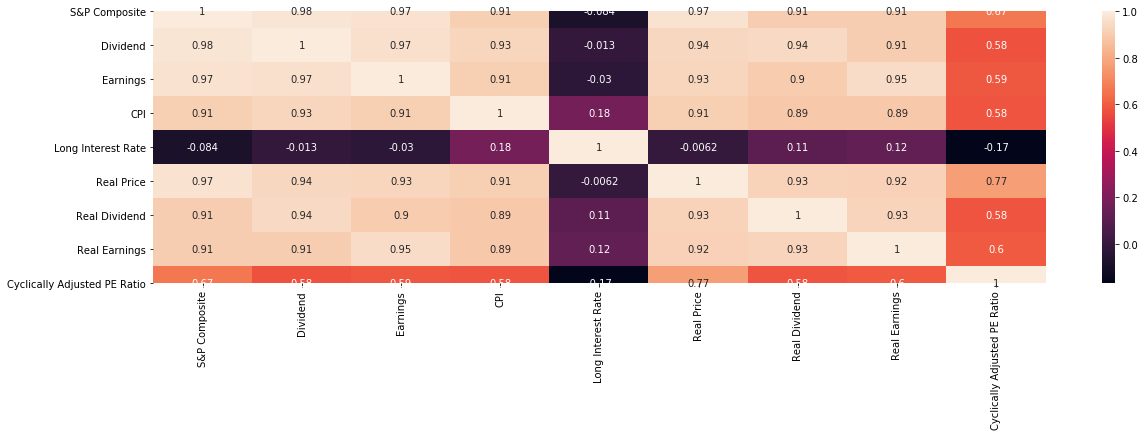

In [380]:
plt.subplots(figsize=(20,5))
cor= df.corr()
sns.heatmap(cor,annot=True)

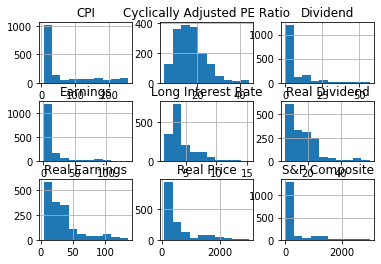

In [381]:
df.hist()
plt.show()

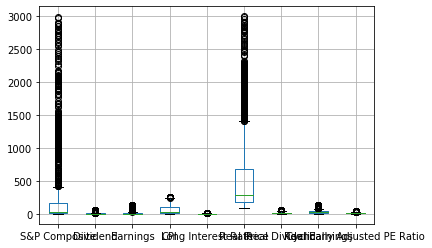

In [382]:
df.boxplot()

### log 

In [383]:
df_transform=df.apply(lambda x : np.log(x))
df_transform.head()

,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio
0,1.822935,-1.328025,-0.721958,2.242773,1.308333,5.129778,1.978818,2.584885,2.916362
1,1.819699,-1.309333,-0.730434,2.252826,1.306529,5.116490,1.987458,2.566357,2.898519
2,1.830980,-1.290984,-0.739191,2.252826,1.304723,5.127771,2.005807,2.557600,2.905267
3,1.827770,-1.272966,-0.748026,2.262770,1.302913,5.114617,2.013881,2.538821,2.887596
4,1.871802,-1.255266,-0.756726,2.252826,1.301100,5.168593,2.041525,2.540065,2.937558


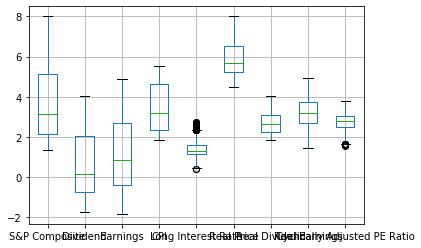

In [384]:
df_transform.boxplot()

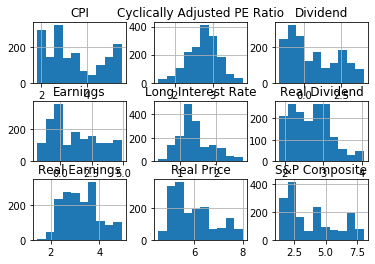

In [385]:
df_transform.hist()
plt.show()

### splitting data 

In [386]:
x=df.drop(columns='S&P Composite',axis=1)
y=df['S&P Composite']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(1165, 8)
(500, 8)
(500,)


In [387]:
from sklearn.preprocessing import StandardScaler
sc = preprocessing.StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

### BASE Model

In [388]:
bm= sm.OLS(y_train, sm.add_constant(x_train)).fit()
bm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          S&P Composite   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 5.161e+04
Date:                Thu, 23 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:42:39   Log-Likelihood:                -5626.8
No. Observations:                1165   AIC:                         1.127e+04
Df Residuals:                    1156   BIC:                         1.132e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          162.3143      5.526     29.370      0.000     151.471     173.157
Dividend                        33.2003      0.899     36.932      0.000      31.436      34.964
Earnings                         4.0239      0.361     11.153      0.000       3.316       4.732
CPI                             -1.0352      0.046    -22.696      0.000      -1.125      -0.946
Long Interest Rate              -3.6836      0.566     -6.513      0.000      -4.793      -2.574
Real Price                       0.6817      0.009     72.273      0.000       0.663       0.700
Real Dividend                  -17.5984      0.637    -27.610      0.000     -18.849     -16.348
Real Earnings                   -1.6095      0.275     -5.850      0.000      -2.149      -1.070
Cyclically Adjusted PE Ratio    -6.0123      0.306    -19.655      0.000      -6.612      -5.412
==============================================================================
Omnibus:                       14.781   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.162
Skew:                           0.279   Prob(JB):                     0.000510
Kurtosis:                       2.978   Cond. No.                     5.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [389]:
lr = LinearRegression()
lr = lr.fit(x_train,y_train)
print(f'R^2 score for train: {lr.score(x_train, y_train)}')
print(f'R^2 score for test: {lr.score(x_test, y_test)}')

R^2 score for train: 0.9972081027240788
R^2 score for test: 0.9974971476435958


### Assumptions 

#### normality of residuals 

In [390]:
stat, p = jarque_bera(bm.resid)
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

Statistics=15.162, p-value=0.001


the rsiduals are not normally distributed 

#### multicollinearity

In [391]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=x.columns).T

,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio
vif,158.235164,148.364842,23.711969,9.274308,49.294018,136.093204,168.109358,19.687341


#### linearity of residuals

In [392]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=bm, frac=0.5)

(1.0222628090293384, 0.39577196295156886)

The residuals are linear 

#### homoscedaticity 

In [393]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(bm.resid, bm.model.exog)
lzip(name, test)

[('F statistic', 0.9972467207881807), ('p-value', 0.5131524768089797)]

the residuals are homoscedastic 

### Reducing multicollinearity 

In [394]:
df.head()

,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio
0,6.19,0.265,0.4858,9.419420,3.700000,168.979665,7.234186,13.261764,18.473952
1,6.17,0.270,0.4817,9.514585,3.693333,166.749008,7.296958,13.018314,18.147258
2,6.24,0.275,0.4775,9.514585,3.686667,168.640812,7.432087,12.904806,18.270119
3,6.22,0.280,0.4733,9.609669,3.680000,166.437003,7.492341,12.664732,17.950108
4,6.50,0.285,0.4692,9.514585,3.673333,175.667512,7.702345,12.680492,18.869719


In [395]:
df['Dividend/Earnings'] = df['Dividend']/df['Earnings']
df.head()

,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio,Dividend/Earnings
0,6.19,0.265,0.4858,9.419420,3.700000,168.979665,7.234186,13.261764,18.473952,0.545492
1,6.17,0.270,0.4817,9.514585,3.693333,166.749008,7.296958,13.018314,18.147258,0.560515
2,6.24,0.275,0.4775,9.514585,3.686667,168.640812,7.432087,12.904806,18.270119,0.575916
3,6.22,0.280,0.4733,9.609669,3.680000,166.437003,7.492341,12.664732,17.950108,0.591591
4,6.50,0.285,0.4692,9.514585,3.673333,175.667512,7.702345,12.680492,18.869719,0.607417


In [396]:
df['Inflation rate'] = (df['CPI'].diff()/df['CPI']).replace(np.nan,0)
df['Inflation rate']= df['Inflation rate']*100
df.head()

,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio,Dividend/Earnings,Inflation rate
0,6.19,0.265,0.4858,9.419420,3.700000,168.979665,7.234186,13.261764,18.473952,0.545492,0.000000
1,6.17,0.270,0.4817,9.514585,3.693333,166.749008,7.296958,13.018314,18.147258,0.560515,1.000204
2,6.24,0.275,0.4775,9.514585,3.686667,168.640812,7.432087,12.904806,18.270119,0.575916,0.000000
3,6.22,0.280,0.4733,9.609669,3.680000,166.437003,7.492341,12.664732,17.950108,0.591591,0.989465
4,6.50,0.285,0.4692,9.514585,3.673333,175.667512,7.702345,12.680492,18.869719,0.607417,-0.999353


In [397]:
df['% change in index due to Inflation'] = ((df['S&P Composite']-df['Real Price'])/df['Real Price'])*100
df.head()

,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio,Dividend/Earnings,Inflation rate,% change in index due to Inflation
0,6.19,0.265,0.4858,9.419420,3.700000,168.979665,7.234186,13.261764,18.473952,0.545492,0.000000,-96.336837
1,6.17,0.270,0.4817,9.514585,3.693333,166.749008,7.296958,13.018314,18.147258,0.560515,1.000204,-96.299828
2,6.24,0.275,0.4775,9.514585,3.686667,168.640812,7.432087,12.904806,18.270119,0.575916,0.000000,-96.299828
3,6.22,0.280,0.4733,9.609669,3.680000,166.437003,7.492341,12.664732,17.950108,0.591591,0.989465,-96.262850
4,6.50,0.285,0.4692,9.514585,3.673333,175.667512,7.702345,12.680492,18.869719,0.607417,-0.999353,-96.299828


In [398]:
df['Real Dividend/Real Earnings'] = df['Real Dividend']/df['Real Earnings']
df.head()

,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio,Dividend/Earnings,Inflation rate,% change in index due to Inflation,Real Dividend/Real Earnings
0,6.19,0.265,0.4858,9.419420,3.700000,168.979665,7.234186,13.261764,18.473952,0.545492,0.000000,-96.336837,0.545492
1,6.17,0.270,0.4817,9.514585,3.693333,166.749008,7.296958,13.018314,18.147258,0.560515,1.000204,-96.299828,0.560515
2,6.24,0.275,0.4775,9.514585,3.686667,168.640812,7.432087,12.904806,18.270119,0.575916,0.000000,-96.299828,0.575916
3,6.22,0.280,0.4733,9.609669,3.680000,166.437003,7.492341,12.664732,17.950108,0.591591,0.989465,-96.262850,0.591591
4,6.50,0.285,0.4692,9.514585,3.673333,175.667512,7.702345,12.680492,18.869719,0.607417,-0.999353,-96.299828,0.607417


In [399]:
df['change in D_E due to inflation'] = df['Dividend/Earnings']- df['Real Dividend/Real Earnings']

In [400]:
df.head()

,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio,Dividend/Earnings,Inflation rate,% change in index due to Inflation,Real Dividend/Real Earnings,change in D_E due to inflation
0,6.19,0.265,0.4858,9.419420,3.700000,168.979665,7.234186,13.261764,18.473952,0.545492,0.000000,-96.336837,0.545492,-7.660539e-15
1,6.17,0.270,0.4817,9.514585,3.693333,166.749008,7.296958,13.018314,18.147258,0.560515,1.000204,-96.299828,0.560515,-5.551115e-16
2,6.24,0.275,0.4775,9.514585,3.686667,168.640812,7.432087,12.904806,18.270119,0.575916,0.000000,-96.299828,0.575916,-2.320366e-14
3,6.22,0.280,0.4733,9.609669,3.680000,166.437003,7.492341,12.664732,17.950108,0.591591,0.989465,-96.262850,0.591591,7.549517e-15
4,6.50,0.285,0.4692,9.514585,3.673333,175.667512,7.702345,12.680492,18.869719,0.607417,-0.999353,-96.299828,0.607417,1.110223e-15


### dropping columns 

In [469]:
df1 = df.drop(columns=['Dividend','Earnings','Real Dividend','Real Earnings','Real Dividend/Real Earnings'],axis=1)
df1.head()

,S&P Composite,CPI,Long Interest Rate,Real Price,Cyclically Adjusted PE Ratio,Dividend/Earnings,Inflation rate,% change in index due to Inflation,change in D_E due to inflation
0,6.19,9.419420,3.700000,168.979665,18.473952,0.545492,0.000000,-96.336837,-7.660539e-15
1,6.17,9.514585,3.693333,166.749008,18.147258,0.560515,1.000204,-96.299828,-5.551115e-16
2,6.24,9.514585,3.686667,168.640812,18.270119,0.575916,0.000000,-96.299828,-2.320366e-14
3,6.22,9.609669,3.680000,166.437003,17.950108,0.591591,0.989465,-96.262850,7.549517e-15
4,6.50,9.514585,3.673333,175.667512,18.869719,0.607417,-0.999353,-96.299828,1.110223e-15


In [470]:
df1=df1.drop(columns=['CPI','Real Price'],axis=1)

### Building model with transformed features 

In [471]:
x=df1.drop(columns='S&P Composite',axis=1)
y=df1['S&P Composite']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(1165, 6)
(500, 6)
(500,)


In [472]:
x_const=sm.add_constant(x_train)

In [473]:
bm= sm.OLS(y_train, x_const).fit()
bm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          S&P Composite   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     2305.
Date:                Thu, 23 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:50:58   Log-Likelihood:                -7658.7
No. Observations:                1165   AIC:                         1.533e+04
Df Residuals:                    1159   BIC:                         1.536e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               1791.8343     40.871     43.841      0.000    1711.645    1872.023
Long Interest Rate                   -57.5840      2.465    -23.361      0.000     -62.420     -52.748
Cyclically Adjusted PE Ratio           9.0516      1.042      8.685      0.000       7.007      11.096
Dividend/Earnings                    -85.9412     22.129     -3.884      0.000    -129.358     -42.525
Inflation rate                         0.3859      5.462      0.071      0.944     -10.332      11.103
% change in index due to Inflation    17.6712      0.231     76.345      0.000      17.217      18.125
change in D_E due to inflation     -7.343e-12   1.92e-13    -38.221      0.000   -7.72e-12   -6.97e-12
==============================================================================
Omnibus:                      575.342   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6847.991
Skew:                           1.981   Prob(JB):                         0.00
Kurtosis:                      14.197   Cond. No.                     6.20e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.08e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Not normally distributed as per jarque bera

In [474]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

lr = LinearRegression()
lr = lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)

rmse = np.sqrt(mse)

rsquared = r2_score(y_test,y_pred)

cols = ['Model', 'R-Squared','MSE','RMSE']

result_tabulation = pd.DataFrame(columns = cols)

metrics = pd.Series({'Model': "Linear regression base model",'R-Squared': rsquared,'MSE':mse,'RMSE':rmse,})

result_tabulation = result_tabulation.append(metrics, ignore_index = True)

result_tabulation

,Model,R-Squared,MSE,RMSE
0,Linear regression base model,0.903147,35577.534732,188.62008


In [475]:
resid=bm.resid

In [479]:
y_pred=bm.predict(x_const)

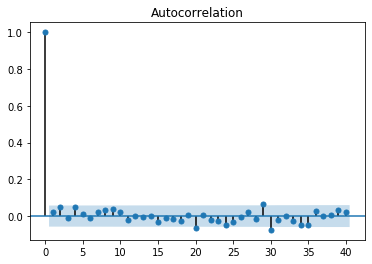

In [480]:
acf=smt.graphics.plot_acf(resid,lags=40,alpha=0.05)
acf.show()

No autocorrelation

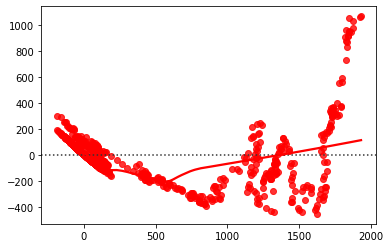

In [481]:
sns.residplot(y_pred,resid,lowess=True,color='r')

In [482]:
sm.stats.diagnostic.linear_rainbow(res=bm,frac=0.5)

(1.4143759142478933, 1.5980280736834796e-05)

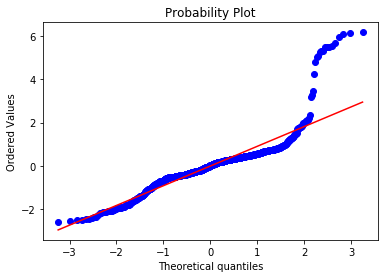

In [483]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = bm.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

Residuals are Not linear

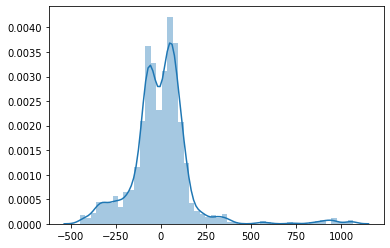

In [484]:
sns.distplot(resid)

The residuals are not normally distributed.

In [485]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=x.columns).T

,Long Interest Rate,Cyclically Adjusted PE Ratio,Dividend/Earnings,Inflation rate,% change in index due to Inflation,change in D_E due to inflation
vif,3.53069,3.722377,6.050097,1.076939,5.937685,1.009026


#### multi collinearity is handled 

In [486]:
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(resid, bm.model.exog)
lzip(name, test)

[('F statistic', 0.9371048650443622), ('p-value', 0.7821341253088382)]

The residuals are Homoskedastic

In [487]:
from sklearn.preprocessing import PolynomialFeatures 

In [488]:
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(x)

In [489]:
x.isna().sum()

Long Interest Rate                    0
Cyclically Adjusted PE Ratio          0
Dividend/Earnings                     0
Inflation rate                        0
% change in index due to Inflation    0
change in D_E due to inflation        0
dtype: int64

In [490]:
x_train,x_test,y_train,y_test=train_test_split(X_poly,y,test_size=0.30,random_state=2)

In [491]:
x_train

array([[ 1.00000000e+00,  3.89333333e+00,  8.88832736e+00, ...,
         1.93333010e-10, -4.60058803e-26,  1.09476443e-41],
       [ 1.00000000e+00,  7.80000000e+00,  1.38886886e+01, ...,
         4.24555535e-11, -9.52290786e-27,  2.13601677e-42],
       [ 1.00000000e+00,  3.98250000e+00,  1.47214885e+01, ...,
        -2.86510995e-10, -9.12863085e-26, -2.90850622e-41],
       ...,
       [ 1.00000000e+00,  4.30500000e+00,  6.46130587e+00, ...,
         3.29488506e-11, -1.33123232e-27,  5.37857762e-44],
       [ 1.00000000e+00,  3.87666667e+00,  9.31063968e+00, ...,
        -1.77718141e-10, -3.89231482e-26, -8.52479921e-42],
       [ 1.00000000e+00,  1.01800000e+01,  8.10422581e+00, ...,
         3.09729541e-11, -3.02575344e-27,  2.95586395e-43]])

In [492]:
lr = LinearRegression()
lr = lr.fit(x_train,y_train)
print(f'R^2 score for train: {lr.score(x_train, y_train)}')
print(f'R^2 score for test: {lr.score(x_test, y_test)}')

R^2 score for train: 0.9989582784218747
R^2 score for test: 0.9985646862225706


In [493]:
x_const=sm.add_constant(x_train)

In [494]:
bmz= sm.OLS(y_train, x_const).fit()
bmz.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          S&P Composite   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.935e+04
Date:                Thu, 23 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:51:59   Log-Likelihood:                -5052.1
No. Observations:                1165   AIC:                         1.022e+04
Df Residuals:                    1109   BIC:                         1.050e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3133.4650    221.153    -14.169      0.000   -3567.390   -2699.540
x1           262.2840     43.916      5.972      0.000     176.117     348.451
x2           266.3938     16.551     16.095      0.000     233.919     298.869
x3          3771.6758    403.244      9.353      0.000    2980.469    4562.883
x4          -115.5679     80.715     -1.432      0.152    -273.940      42.804
x5           -18.7610      3.993     -4.698      0.000     -26.597     -10.925
x6          1.268e-06   1.42e-07      8.934      0.000    9.89e-07    1.55e-06
x7            -2.8538      3.235     -0.882      0.378      -9.201       3.493
x8           -12.0892      2.016     -5.996      0.000     -16.045      -8.133
x9          -247.9788     61.160     -4.055      0.000    -367.981    -127.976
x10           17.8880     11.073      1.615      0.107      -3.839      39.615
x11            1.4180      0.432      3.286      0.001       0.571       2.265
x12          1.52e-07   1.72e-08      8.817      0.000    1.18e-07    1.86e-07
x13           -2.5647      0.376     -6.813      0.000      -3.303      -1.826
x14         -118.6514     20.394     -5.818      0.000    -158.666     -78.637
x15           -0.3717      3.720     -0.100      0.920      -7.670       6.927
x16            3.4273      0.152     22.544      0.000       3.129       3.726
x17        -3.171e-08   3.45e-09     -9.194      0.000   -3.85e-08   -2.49e-08
x18        -1095.7836    127.635     -8.585      0.000   -1346.218    -845.349
x19          129.4751     48.350      2.678      0.008      34.607     224.344
x20           32.5356      4.216      7.717      0.000      24.264      40.808
x21        -7.166e-09   8.16e-10     -8.787      0.000   -8.77e-09   -5.57e-09
x22           15.3691      9.614      1.599      0.110      -3.494      34.232
x23           -0.3104      1.171     -0.265      0.791      -2.608       1.987
x24        -5.627e-09   6.48e-10     -8.681      0.000    -6.9e-09   -4.36e-09
x25            0.2773      0.040      6.925      0.000       0.199       0.356
x26         9.257e-08   9.69e-09      9.550      0.000    7.36e-08    1.12e-07
x27         1.062e-09   1.26e-10      8.448      0.000    8.16e-10    1.31e-09
x28           -0.0621      0.067     -0.926      0.355      -0.194       0.070
x29            0.1072      0.068      1.577      0.115      -0.026       0.241
x30            2.5944      2.269      1.143      0.253      -1.858       7.047
x31           -0.2717      0.319     -0.853      0.394      -0.897       0.354
x32            0.0024      0.017      0.139      0.889      -0.032       0.036
x33        -1.826e-08   2.01e-09     -9.105      0.000   -2.22e-08   -1.43e-08
x34            0.0720      0.022      3.221      0.001       0.028       0.116
x35            3.8972      1.344      2.900      0.004       1.261       6.534
x3

In [495]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)

rmse = np.sqrt(mse)

rsquared = r2_score(y_test,y_pred)

cols = ['Model', 'R-Squared','MSE','RMSE']

result_tabulation = pd.DataFrame(columns = cols)

metrics = pd.Series({'Model': "Linear regression model with polynomial features",'R-Squared': rsquared,'MSE':mse,'RMSE':rmse,})

result_tabulation = result_tabulation.append(metrics, ignore_index = True)


result_tabulation


,Model,R-Squared,MSE,RMSE
0,Linear regression model with polynomial features,0.998565,527.241259,22.961735


In [452]:
resid=bmz.resid

In [453]:
y_pred=bmz.predict(x_const)

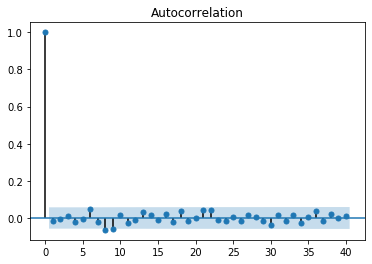

In [454]:
acf=smt.graphics.plot_acf(resid,lags=40,alpha=0.05)
acf.show()

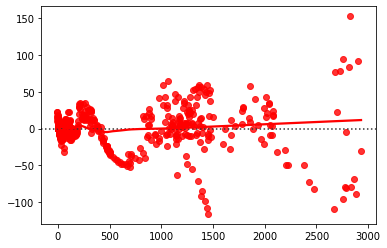

In [455]:
sns.residplot(y_pred,resid,lowess=True,color='r')

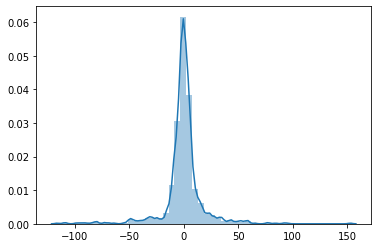

In [456]:
sns.distplot(resid)

In [457]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_poly, i) for i in range(X_poly.shape[1])]
print(vif)

[150014.22726127008, 34133.18923780369, 37762.20818583439, 33649.25805886217, 17407.244264920784, 35704.00284800307, 1.1115311173039122, 36019.10693218485, 21388.50527713846, 17607.80375824056, 5808.491025621403, 15504.20494637111, 1.0821279527917647, 33955.598383973105, 27839.87768893006, 8556.47436211329, 17064.19557080223, 1.0968007240379383, 22097.462200108464, 3107.6085384219687, 36002.128822653096, 1.7291483923228057, 1684.378164649897, 30929.413788062055, 1.1541582257421719, 51661.63182886777, 1.0251301959592511, 1.9523315055003636, 2367.824861868853, 2025.6632001417458, 3410.4271225588827, 210.51507491914802, 3986.1437876658138, 1.051347309157056, 2898.683158679833, 2382.4393753854797, 674.6063707678355, 1583.6002914477292, 1.0761196235105228, 2119.8430288173586, 881.9222395661235, 2436.3574077688277, 1.582459464984765, 109.39018078385521, 1948.5616829871635, 1.1130567963811622, 4742.398967930222, 1.029681911391609, 1.8602992110100531, 2637.5800601388755, 3421.7031928097094, 24

In [458]:
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(resid, bmz.model.exog)
lzip(name, test)

[('F statistic', 0.9025184388068619), ('p-value', 0.880174003963622)]

### Ridge regression 

In [459]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 2)
lr = LinearRegression()
lr.fit(x_train, y_train)
rr = Ridge(alpha=0.01) 
rr.fit(x_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [460]:
print(f'R^2 score for train: {rr.score(x_train, y_train)}')
print(f'R^2 score for test: {rr.score(x_test, y_test)}')

y_pred = rr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)

rmse = np.sqrt(mse)

rsquared = r2_score(y_test,y_pred)

metrics = pd.Series({'Model': "ridge regression",'R-Squared': rsquared,'MSE':mse,'RMSE':rmse,})


result_tabulation = result_tabulation.append(metrics, ignore_index = True)

result_tabulation

R^2 score for train: 0.9086179600205009
R^2 score for test: 0.9030947072459644


,Model,R-Squared,MSE,RMSE
0,Linear regression model with polynomial features,0.998565,527.241259,22.961735
1,ridge regression,0.903095,35596.724132,188.670941


### Ridge with Grid search 

In [461]:
from sklearn.model_selection import GridSearchCV

lambdas=np.linspace(1,100,100)
params={'alpha':lambdas}
rr_grid =Ridge(fit_intercept=True)
grid_search=GridSearchCV(rr_grid,param_grid=params,cv=10,scoring='neg_mean_absolute_error')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35....,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])},
             pre_dispatch='2*n

In [462]:
grid_search.best_estimator_

Ridge(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [463]:
y_pred=grid_search.predict(x_test)

print(f'R^2 score for train: {rr.score(x_train, y_train)}')
print(f'R^2 score for test: {rr.score(x_test, y_test)}')

mse = mean_squared_error(y_test,y_pred)

rmse = np.sqrt(mse)

rsquared = r2_score(y_test,y_pred)

metrics = pd.Series({'Model': "ridge regression with gridsearch ",'R-Squared': rsquared,'MSE':mse,'RMSE':rmse,})

result_tabulation = result_tabulation.append(metrics, ignore_index = True)

result_tabulation

R^2 score for train: 0.9086179600205009
R^2 score for test: 0.9030947072459644


,Model,R-Squared,MSE,RMSE
0,Linear regression model with polynomial features,0.998565,527.241259,22.961735
1,ridge regression,0.903095,35596.724132,188.670941
2,ridge regression with gridsearch,0.901142,36314.120389,190.562642


### Lasso regression with grid search 

In [464]:
lasso_grid =Lasso(fit_intercept=True)
grid_search=GridSearchCV(lasso_grid,param_grid=params,cv=10,scoring='neg_mean_absolute_error')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21....
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       10

In [465]:
grid_search.best_estimator_

Lasso(alpha=91.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [466]:
y_pred=grid_search.predict(x_test)

print(f'R^2 score for train: {rr.score(x_train, y_train)}')
print(f'R^2 score for test: {rr.score(x_test, y_test)}')

mse = mean_squared_error(y_test,y_pred)

rmse = np.sqrt(mse)

rsquared = r2_score(y_test,y_pred)

metrics = pd.Series({'Model': "Lasso regression with gridsearch ",'R-Squared': rsquared,'MSE':mse,'RMSE':rmse,})

result_tabulation = result_tabulation.append(metrics, ignore_index = True)

result_tabulation

R^2 score for train: 0.9086179600205009
R^2 score for test: 0.9030947072459644


,Model,R-Squared,MSE,RMSE
0,Linear regression model with polynomial features,0.998565,527.241259,22.961735
1,ridge regression,0.903095,35596.724132,188.670941
2,ridge regression with gridsearch,0.901142,36314.120389,190.562642
3,Lasso regression with gridsearch,0.892667,39427.027571,198.562402
